<a href="https://colab.research.google.com/github/plaban1981/HACKEREARTH/blob/master/Hackerearth_Vehicle_Insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement : Predict the condition and insurance Amount

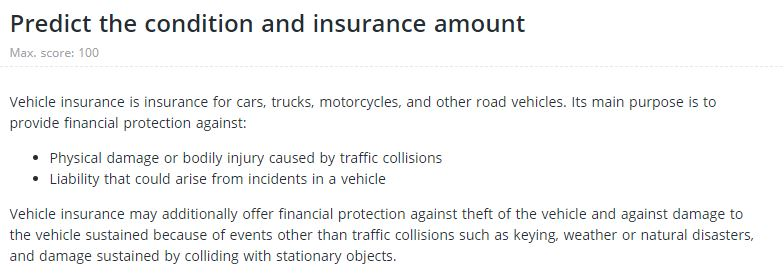

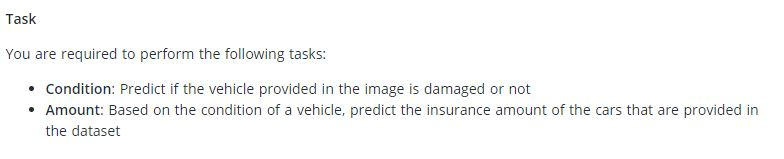

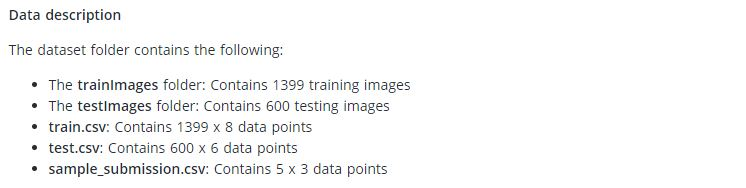

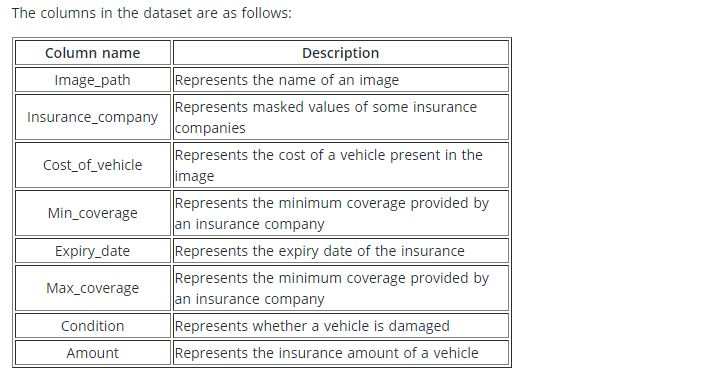

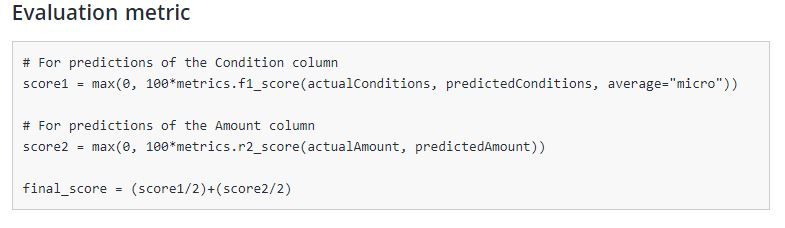

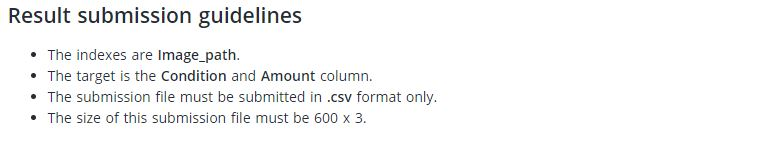

## Mount Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%%capture
!unzip "/content/drive/MyDrive/HackerEarth/a8725fd0b96811eb.zip" -d "/content/drive/MyDrive/HackerEarth/Vehicle"

In [4]:
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch
#from fastai.callbacks.hooks import *
from fastai.callbacks import *
#
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix
#
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
train = pd.read_csv("/content/drive/MyDrive/HackerEarth/Vehicle/dataset/train.csv")
train.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [9]:
test = pd.read_csv("/content/drive/MyDrive/HackerEarth/Vehicle/dataset/test.csv")
test.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.0
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.0
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.0
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.0
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.0


In [10]:
df_train = train[['Image_path','Condition']].copy()
df_train.head()

,Image_path,Condition
0,img_4513976.jpg,0
1,img_7764995.jpg,1
2,img_451308.jpg,0
3,img_7768372.jpg,1
4,img_7765274.jpg,1


In [12]:
df_train.to_csv("/content/drive/MyDrive/HackerEarth/Vehicle/dataset/Training.csv",index=False)

## Visualize Labels

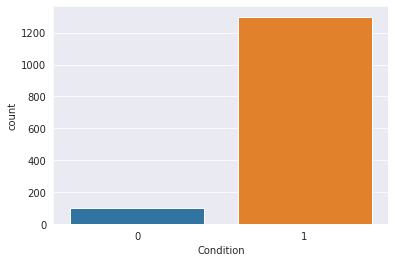

In [11]:
sns.set_style("darkgrid")
sns.countplot(x='Condition',data=df_train)

## Prepare Data

In [16]:
path ='/content/drive/MyDrive/HackerEarth/Vehicle/dataset/trainImages'
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0,do_flip=False)
data = (ImageList.from_csv(path, csv_name = '/content/drive/MyDrive/HackerEarth/Vehicle/dataset/Training.csv')
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '/content/drive/MyDrive/HackerEarth/Vehicle/dataset/testImages')              
        .transform(tfms, size=400)
        .databunch(num_workers=0,bs=8))

## Classes

In [14]:
## print the target classes
val=data.classes
print(f"The number of target class : {data.c} and the respective target classes are a: {data.classes}")

The number of target class : 2 and the respective target classes are a: [0, 1]


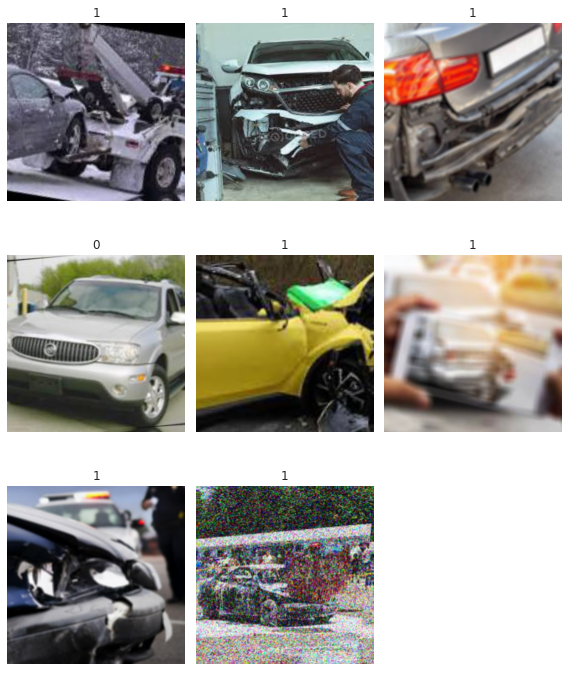

In [17]:
data.show_batch(rows=3, figsize=(8,10))

## Define F1 Metrics

In [18]:
fscore = FBeta(average='macro', beta=2.0)

## Set Path

In [19]:
path= '/content/drive/MyDrive/HackerEarth/Vehicle/dataset/trainImages'
k= '/content/drive/MyDrive/HackerEarth/Vehicle/dataset/Training.csv'
p ='/content/drive/MyDrive/HackerEarth/Vehicle/dataset/test.csv'
#
train=pd.read_csv(k)
test=pd.read_csv(p)

In [20]:
np.random.seed(1786)
ROOT = "/content/drive/MyDrive/HackerEarth/Vehicle/dataset"

## Read Data

In [21]:
def read_data(root):
    train_df = pd.read_csv(k)
    test_df = pd.read_csv(p)
    return train_df, test_df

## Define Callback

In [22]:
class SaveBestModel(Recorder):
    def __init__(self, learn,name='best_model'):
        super().__init__(learn)
        self.name = name
        self.best_loss = None
        self.best_acc = None
        self.best_f1 = None
        self.save_method = self.save_when_acc
        
    def save_when_acc(self, metrics):        
        loss, acc,f1 = metrics[0], metrics[1],metrics[2]
        if (self.best_acc is None) or (acc > self.best_acc) or (loss < self.best_loss) or (f1 > self.best_f1):
            self.best_acc = acc
            self.best_loss = loss
            self.best_f1 = f1
            self.learn.save(f'{self.name}')
            print("Save the best acc {:.5f}".format(self.best_acc))
            print("Save the best f1 {:.5f}".format(self.best_f1))
        elif acc == self.best_acc and  loss < self.best_loss:
            self.best_loss = loss
            self.learn.save(f'{self.name}')
            print("Acc is eq,Save the lower loss {:.5f}".format(self.best_loss))
            
    def on_epoch_end(self,last_metrics=MetricsList,**kwargs:Any):
        self.save_method(last_metrics)

## Resnet34 Model  to train and evaluate on the sample data

(1399, 2) (600, 6)
Starting fold 0
(1311,) (88,)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.094046,0.470023,0.215909,0.784091,0.660256,00:24
1,0.717409,0.368780,0.147727,0.852273,0.637500,00:24
2,0.454715,0.188943,0.045455,0.954545,0.844797,00:24
3,0.315128,0.196848,0.045455,0.954545,0.844797,00:24
4,0.228764,0.210796,0.045455,0.954545,0.844797,00:24


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.165354,0.204141,0.056818,0.943182,0.829895,00:24
1,0.154804,0.189701,0.056818,0.943182,0.829895,00:24
2,0.167828,0.155604,0.034091,0.965909,0.905528,00:24
3,0.154888,0.132746,0.034091,0.965909,0.860258,00:24
4,0.146272,0.130912,0.045455,0.954545,0.844797,00:24
5,0.121396,0.153299,0.056818,0.943182,0.829895,00:25
6,0.093335,0.133045,0.045455,0.954545,0.889276,00:24
7,0.081222,0.098070,0.034091,0.965909,0.905528,00:25
8,0.077220,0.117504,0.034091,0.965909,0.905528,00:24
9,0.071177,0.114724,0.034091,0.965909,0.905528,00:24


Better model found at epoch 0 with error_rate value: 0.056818172335624695.


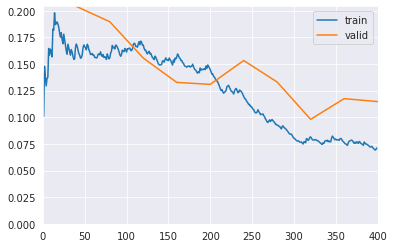

Better model found at epoch 2 with error_rate value: 0.03409089893102646.


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.112241,0.135684,0.034091,0.965909,0.905528,00:24
1,0.107302,0.158398,0.045455,0.954545,0.794431,00:25
2,0.100040,0.153648,0.056818,0.943182,0.724571,00:25
3,0.096164,0.162505,0.056818,0.943182,0.780571,00:25
4,0.081111,0.136885,0.045455,0.954545,0.844797,00:25
5,0.079409,0.133229,0.045455,0.954545,0.844797,00:25
6,0.071847,0.131241,0.068182,0.931818,0.767196,00:25
7,0.069835,0.136311,0.056818,0.943182,0.780571,00:24
8,0.065288,0.131655,0.056818,0.943182,0.780571,00:25
9,0.057221,0.132220,0.068182,0.931818,0.767196,00:25


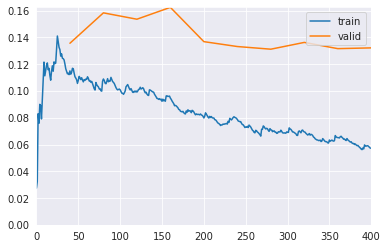

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.102775,0.148541,0.034091,0.965909,0.905528,00:25
1,0.086991,0.141572,0.045455,0.954545,0.844797,00:25
2,0.099814,0.132271,0.034091,0.965909,0.860258,00:24
3,0.104172,0.133489,0.034091,0.965909,0.905528,00:25
4,0.090268,0.140015,0.034091,0.965909,0.905528,00:25


Better model found at epoch 0 with error_rate value: 0.03409089893102646.


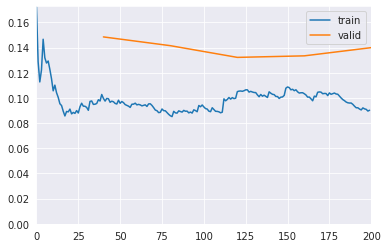

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.111030,0.148725,0.034091,0.965909,0.905528,00:24
1,0.098669,0.142019,0.034091,0.965909,0.905528,00:25
2,0.104434,0.129181,0.022727,0.977273,0.922399,00:25
3,0.108714,0.137721,0.045455,0.954545,0.844797,00:25
4,0.090695,0.136986,0.034091,0.965909,0.905528,00:24
5,0.092271,0.148608,0.045455,0.954545,0.844797,00:24
6,0.095297,0.145661,0.034091,0.965909,0.905528,00:25
7,0.090849,0.151182,0.034091,0.965909,0.905528,00:25


Better model found at epoch 0 with error_rate value: 0.03409089893102646.


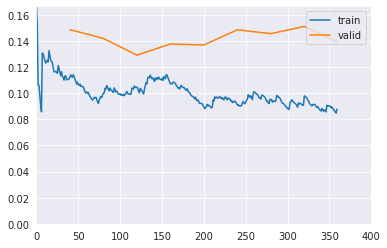

Better model found at epoch 2 with error_rate value: 0.022727273404598236.
Epoch 8: early stopping


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.103209,0.136668,0.034091,0.965909,0.905528,00:25
1,0.100597,0.136559,0.034091,0.965909,0.905528,00:25
2,0.098563,0.143814,0.034091,0.965909,0.905528,00:24
3,0.092082,0.135593,0.034091,0.965909,0.905528,00:25
4,0.090920,0.137516,0.034091,0.965909,0.905528,00:24
5,0.097226,0.140269,0.034091,0.965909,0.905528,00:25
6,0.101930,0.140338,0.034091,0.965909,0.905528,00:25


Better model found at epoch 0 with error_rate value: 0.03409089893102646.


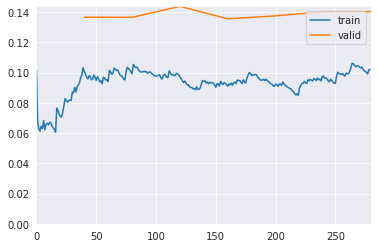

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.201672,0.931625,0.079545,0.920455,0.491505,00:24
1,0.324062,2.118835,0.079545,0.920455,0.491505,00:25
2,0.315406,0.279367,0.079545,0.920455,0.491505,00:25
3,0.289216,0.257229,0.079545,0.920455,0.491505,00:26
4,0.268426,0.223719,0.079545,0.920455,0.491505,00:25


Better model found at epoch 0 with error_rate value: 0.07954545319080353.


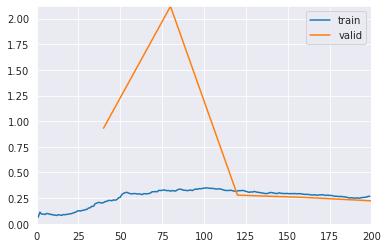

F1 score for this fold  0.8823292092522862


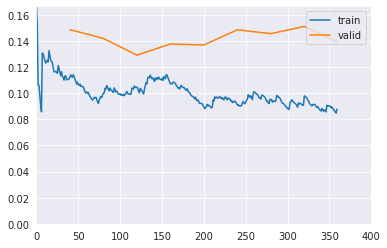

In [25]:
if __name__=="__main__":
    train_df, test_df = read_data(ROOT)
    print(train_df.shape, test_df.shape)
    
    cvlist = list(StratifiedKFold(16, random_state=12345786).split(train_df, train_df.Condition))
    
    tfms1 = get_transforms(max_zoom=1.5)
    test_preds_all = []
    val_preds_all = []
    for i in range(1):
        print("Starting fold {}".format(i))
        tr_idx, val_idx = cvlist[i]
        print(tr_idx.shape, val_idx.shape)
        src = (ImageList.from_df(train_df, path=ROOT,folder="trainImages").split_by_idxs(tr_idx, val_idx)
                                                            .label_from_df())
        data = ImageDataBunch.create_from_ll(src, ds_tfms=tfms1, size=224, bs=32, resize_method=ResizeMethod.SQUISH).normalize(imagenet_stats)
        data.add_test(ImageList.from_df(test_df, path=ROOT, folder="testImages"))
        #learn = cnn_learner(data, models.densenet121, metrics=accuracy, ps=0.5)
        #learn = cnn_learner(data, models.densenet121, metrics=[error_rate,accuracy,fscore], ps=0.5)
        learn = cnn_learner(data, models.resnet34, metrics=[error_rate,accuracy,fscore], ps=0.5)
        # learn.model[0].load_state_dict(torch.load("../input/save-body-weights-marvel/bestmodel_body.path"))
        #cb = SaveBestModel(learn, name="bestmodel_{}".format(i))
        cb =[SaveModelCallback(learn,monitor="error_rate",mode="min",name="bestmodel_{}".format(i)),
                               ShowGraph(learn),EarlyStoppingCallback(learn, min_delta=1e-5, patience=5),]
        # learn.fit(1, callbacks=cb)
        learn.fit_one_cycle(5)
        learn.unfreeze()
        learn.fit_one_cycle(10, max_lr=1e-4, callbacks=cb)
        learn.fit_one_cycle(10, max_lr=5e-5, callbacks=cb)
        learn.fit_one_cycle(5, max_lr=1e-5, callbacks=cb)
        learn.fit_one_cycle(10, max_lr=5e-6, callbacks=cb)
        learn.fit_one_cycle(7, max_lr=1e-6, callbacks=cb)
        learn.fit_one_cycle(5, max_lr=1e-3, callbacks=cb)
        learn.load("bestmodel_{}".format(i))
        val_preds, y = learn.TTA(ds_type=DatasetType.Valid)
        val_preds = np.exp(val_preds.numpy())
        print("F1 score for this fold ",f1_score(y.numpy(), np.argmax(val_preds,axis=1), average='weighted'))
        test_preds = np.exp(learn.TTA(ds_type=DatasetType.Test)[0].numpy())
        test_preds_all.append(test_preds)
        val_preds_all.append(val_preds)
        fname = "bestmodel_{}.pth".format(i)
        src = str(Path(ROOT) / "models" / fname)
    test_preds_all = np.mean(test_preds_all, axis=0)
    val_preds_all = np.concatenate(val_preds_all, axis=0)


## Densenet121

In [ ]:
if __name__=="__main__":
    train_df, test_df = read_data(ROOT)
    print(train_df.shape, test_df.shape)
    
    cvlist = list(StratifiedKFold(5, random_state=12345786).split(train_df, train_df.Condition))
    
    tfms1 = get_transforms(max_zoom=1.5)
    test_preds_all = []
    val_preds_all = []
    for i in range(5):
        print("Starting fold {}".format(i))
        tr_idx, val_idx = cvlist[i]
        print(tr_idx.shape, val_idx.shape)
        src = (ImageList.from_df(train_df, path=ROOT,folder="trainImages").split_by_idxs(tr_idx, val_idx)
                                                            .label_from_df())
        data = ImageDataBunch.create_from_ll(src, ds_tfms=tfms1, size=224, bs=32, resize_method=ResizeMethod.SQUISH).normalize(imagenet_stats)
        data.add_test(ImageList.from_df(test_df, path=ROOT, folder="testImages"))
        #learn = cnn_learner(data, models.densenet121, metrics=accuracy, ps=0.5)
        #learn = cnn_learner(data, models.densenet121, metrics=[error_rate,accuracy,fscore], ps=0.5)
        learn = cnn_learner(data, models.densenet121, metrics=[error_rate,accuracy,fscore], ps=0.5)
        # learn.model[0].load_state_dict(torch.load("../input/save-body-weights-marvel/bestmodel_body.path"))
        #cb = SaveBestModel(learn, name="bestmodel_{}".format(i))
        cb =[SaveModelCallback(learn,monitor="error_rate",mode="min",name="bestmodel_{}".format(i)),
                               ShowGraph(learn),EarlyStoppingCallback(learn, min_delta=1e-5, patience=5),]
        # learn.fit(1, callbacks=cb)
        learn.fit_one_cycle(5)
        learn.unfreeze()
        learn.fit_one_cycle(10, max_lr=1e-4, callbacks=cb)
        learn.fit_one_cycle(10, max_lr=5e-5, callbacks=cb)
        learn.fit_one_cycle(5, max_lr=1e-5, callbacks=cb)
        learn.fit_one_cycle(10, max_lr=5e-6, callbacks=cb)
        learn.fit_one_cycle(7, max_lr=1e-6, callbacks=cb)
        learn.fit_one_cycle(5, max_lr=1e-3, callbacks=cb)
        learn.load("bestmodel_{}".format(i))
        val_preds, y = learn.TTA(ds_type=DatasetType.Valid)
        val_preds = np.exp(val_preds.numpy())
        print("F1 score for this fold ",f1_score(y.numpy(), np.argmax(val_preds,axis=1), average='weighted'))
        test_preds = np.exp(learn.TTA(ds_type=DatasetType.Test)[0].numpy())
        test_preds_all.append(test_preds)
        val_preds_all.append(val_preds)
        fname = "bestmodel_{}.pth".format(i)
        src = str(Path(ROOT) / "models" / fname)
    test_preds_all = np.mean(test_preds_all, axis=0)
    val_preds_all = np.concatenate(val_preds_all, axis=0)


(1399, 2) (600, 6)
Starting fold 0
(1119,) (280,)


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.208627,0.655779,0.314286,0.685714,0.572785,00:25


In [30]:
df_test = test.copy()
df_test["Condition"] = np.argmax(test_preds, axis=1)

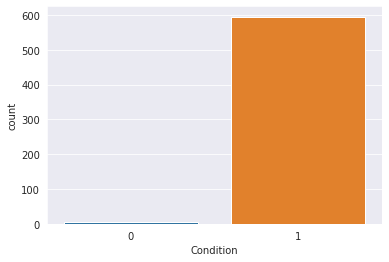

In [31]:
sns.countplot(x='Condition',data=df_test)

In [32]:
df_test.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.0,1
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.0,1
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.0,1
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.0,1
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.0,1


In [34]:
test.shape,df_test.shape

((600, 6), (600, 7))

In [33]:
df_test.to_csv("/content/drive/MyDrive/HackerEarth/Vehicle/dataset/Predicted_test_condition.csv",index=False)